## Additional Learning Resources
Refer to [scikit-learn documentation](https://scikit-learn.org/stable/) and the [Pandas user guide](https://pandas.pydata.org/docs/) for detailed explanations of the functions used in this notebook.
For a quick refresher on splitting data:
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```


# Evaluating classifiers


## Additional Learning Resources
Refer to [scikit-learn documentation](https://scikit-learn.org/stable/) and the [Pandas user guide](https://pandas.pydata.org/docs/) for detailed explanations of the functions used in this notebook.
For a quick refresher on splitting data:
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```


In [57]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_roc_curve, auc, roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve

## 1. Load data

In [17]:
X,y = load_breast_cancer(return_X_y=True)

In [18]:
print(X.shape, y.shape)

(569, 30) (569,)


In [19]:
# percentage of positives in the dataset
sum(y == 1) / len(y)

0.6274165202108963

## 2. Split data

In [20]:
# train/test split and stratify the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size= 0.4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((341, 30), (228, 30), (341,), (228,))

## 3. Fit the Model

In [21]:
m = LogisticRegression() #create a model
m.fit(X_train,y_train) #train the model

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 4. Test for Overfitting and Underfitting

In [22]:
# train accuracy
m.score(X_train,y_train)  

0.9472140762463344

In [25]:
# another way of computing accuracy and we are going to do it for test data 

ypred = m.predict(X_test) 
accuracy_score(y_test,ypred) 

0.9473684210526315

no overfitting here since train and test are very close

no underfitting here since the accuracy score is pretty high

## 5. Precision vs recall


In [28]:
precision = precision_score(y_test,ypred)
recall = recall_score(y_test,ypred)

print(precision_score(y_test,ypred), recall_score(y_test,ypred))

0.9407894736842105 0.9794520547945206


---

## 6. Confusion matrix


In [36]:
conf = confusion_matrix(y_test,ypred)
conf

array([[ 73,   9],
       [  3, 143]])

Text(0.5, 1.0, 'Confusion Matrix')

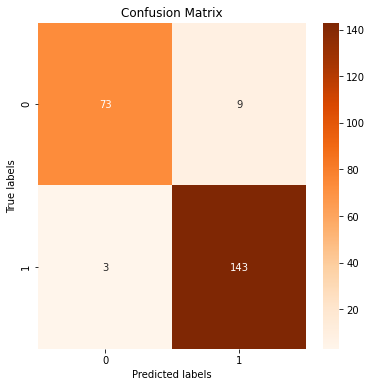

In [42]:
#plot the heatmap
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(conf, annot=True, ax = ax, fmt='g', cmap = 'Oranges')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

## 7. Receiver Operator Curve and Area Under the Curve.



In [47]:
probs = m.predict_proba(X_test) 
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])

In [49]:
probs[:5]

array([[4.82345358e-04, 9.99517655e-01],
       [5.71507769e-03, 9.94284922e-01],
       [6.10337767e-01, 3.89662233e-01],
       [9.90221338e-01, 9.77866241e-03],
       [9.99991745e-01, 8.25503951e-06]])

In [50]:
probs[0][0] + probs[0][1] 

1.0

Area under the curve =  0.9896424991647177


(0.0, 1.0)

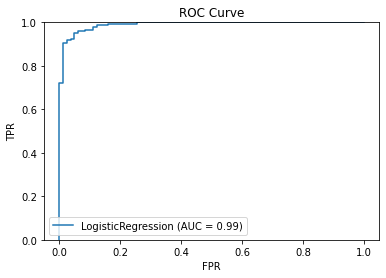

In [51]:
# Calculating area under the curve
auc_score = auc(fpr, tpr)
print("Area under the curve = ",auc_score)

plot_roc_curve(m, X_test, y_test)  
plt.title("ROC Curve")

plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend(loc="lower left")
plt.ylim([0,1.00])

## 8. Precision Recall Curve

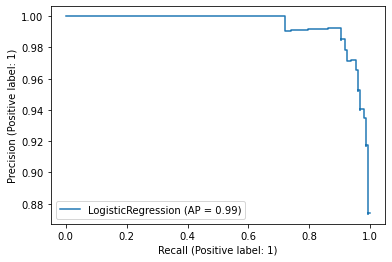

In [54]:
# plot precision and recall curve 
plot_precision_recall_curve(m, X_test, y_test)

In [58]:
precisions, recalls, thresholds = precision_recall_curve(y_test, probs[:,1])

In [59]:
# compute area under precision recall curve 
pr_area = auc(recalls, precisions)
pr_area

0.9940621300222301

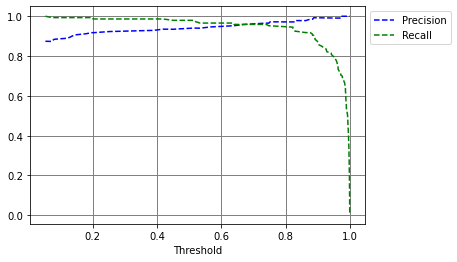

In [69]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
plt.show()